In [21]:
import cv2
import sys
import glob
import os
import numpy as np
from typing import List, Optional

In [23]:
#version 1.0

#Define image paths/folders pattern
image_folders = "../PALMS+/*/Session_*/images"

folders = glob.glob(image_folders)

#go thru images in each folder
for folder in folders:
    parts = folder.strip("/").split("/") #[PALMS, Session_1, images]

    if len(parts) < 3:
        print("Folder structure not as expected: ", folder)
        continue

    #get building
    building = parts[-3]
    #Get the session number
    session = parts[-2]

    #compooser output name
    output_name = f"{building}_{session}_pano.png"
   
    #get the images
    image_files = sorted(glob.glob(os.path.join(folder, "*.png")))
    images = []
    for img_path in image_files:
        img = cv2.imread(img_path)
        if img is not None:
            rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
            images.append(rotated)

    #skip if no images/only 1
    if len(images) < 1:
        print(f"No images to stitch in {folder}, only {len(images)} images")
        continue

    #Sitit
    stitcher = cv2.Stitcher_create()
    (status, pano) = stitcher.stitch(images)

    if status == cv2.Stitcher_OK:
        #save the stitched image
        output_path = os.path.join("panoramas", output_name)
        os.makedirs("panoramas1.0", exist_ok=True)
        cv2.imwrite(output_path, pano)
        print(f"Stitched image saved to {output_path}")
    else:
        print(f"Error during stitching in {folder}: {status}")
        continue


** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number 

error: OpenCV(4.7.0) /Users/runner/miniforge3/conda-bld/libopencv_1675730057878/work/modules/flann/src/miniflann.cpp:521: error: (-215:Assertion failed) (size_t)knn <= index_->size() in function 'runKnnSearch_'


In [20]:
#version 2.0 debugged version 1

# Define the image folders pattern
image_folders = "../PALMS+/*/Session_*/images"

# Get all folders
folders = glob.glob(image_folders)

# Loop through each folder
for folder in folders:
    parts = folder.strip("/").split("/")  # e.g., ['..', 'PALMS+', 'BE', 'Session_0222', 'images']

    if len(parts) < 3:
        print("Folder structure not as expected:", folder)
        continue

    # Extract building and session
    building = parts[-3]
    session = parts[-2]

    # Compose output filename
    output_name = f"{building}_{session}_pano.png"

    # Get list of image files
    image_files = sorted(glob.glob(os.path.join(folder, "*.png")))

    images = []
    for img_path in image_files:
        img = cv2.imread(img_path)
        if img is None:
            print(f" - Skipping unreadable image: {img_path}")
            continue
        if img.size == 0:
            print(f" - Skipping empty image: {img_path}")
            continue

        # Resize if too large (optional but avoids LAPACK issues)
        max_dim = 1000
        if max(img.shape[:2]) > max_dim:
            scale = max_dim / max(img.shape[:2])
            img = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

        # Rotate 90° clockwise
        rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        images.append(rotated)

    # Skip folders with fewer than 2 images
    if len(images) < 2:
        print(f"Not enough images to stitch in {folder}, only {len(images)} image(s).")
        continue

    # Pre-stitch validation
    invalid = any(
        img is None or img.size == 0 or
        np.isnan(img).any() or np.isinf(img).any()
        for img in images
    )
    if invalid:
        print(f"❌ Invalid image data found in {folder}. Skipping.")
        continue

    # Ensure all images have same shape and type
    base_shape = images[0].shape
    images = [cv2.resize(img, (base_shape[1], base_shape[0])) for img in images]
    images = [img.astype(np.uint8) for img in images]

    # Safe stitching
    try:
        stitcher = cv2.Stitcher_create()
        status, pano = stitcher.stitch(images)
    except cv2.error as e:
        print(f"❌ OpenCV error in {folder}: {e}")
        continue


    # Stitch images
    stitcher = cv2.Stitcher_create()
    status, pano = stitcher.stitch(images)

    if status == cv2.Stitcher_OK:
        os.makedirs("panoramas1.0", exist_ok=True)
        output_path = os.path.join("panoramas1.0", output_name)
        cv2.imwrite(output_path, pano)
        print(f"Stitched image saved to {output_path}")
    else:
        print(f"Stitching failed in {folder}")
        print(f"   - Error code: {status}")
        print(f"   - Images used: {len(images)}")
        for img_path in image_files:
            print(f"     - {img_path}")


AttributeError: 'function' object has no attribute 'glob'

In [28]:
#debugging 

folder = "../PALMS+/SVC/Session_1744241864/images/"
image_files = sorted(glob.glob(os.path.join(folder, "*.png")))
images = []

for img_path in image_files:
    print(f"🧪 Checking: {img_path}")
    img = cv2.imread(img_path)

    if img is None:
        print(f"❌ cv2.imread() failed for: {img_path}")
        continue

    if img.size == 0:
        print(f"❌ Image is empty: {img_path}")
        continue

    if len(img.shape) != 3:
        print(f"❌ Image does not have 3 dimensions (H, W, C): {img_path}, shape: {img.shape}")
        continue

    if img.shape[2] != 3:
        print(f"❌ Image does not have 3 color channels: {img_path}, shape: {img.shape}")
        continue

    print(f"✅ Image accepted: {img.shape}")

    # If passed all checks:
    img = img.astype(np.uint8)
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

    # Optional resize
    max_dim = 1200
    h, w = img.shape[:2]
    if max(h, w) > max_dim:
        scale = max_dim / max(h, w)
        img = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

    images.append(img)


if len(images) < 2:
    print("Not enough valid images")
else:
    try:
        stitcher = cv2.Stitcher_create()
        status, pano = stitcher.stitch(images)
        if status == cv2.Stitcher_OK:
            cv2.imwrite("test_output_pano.png", pano)
            print("✅ Panorama created: test_output_pano.png")
        else:
            print(f"❌ Stitching failed. Status code: {status}")
    except cv2.error as e:
        print(f"❌ OpenCV threw an exception:\n{e}")


🧪 Checking: ../PALMS+/SVC/Session_1744241864/images/image_0042725.png
✅ Image accepted: (1440, 1920, 3)
🧪 Checking: ../PALMS+/SVC/Session_1744241864/images/image_0042729.png
✅ Image accepted: (1440, 1920, 3)
🧪 Checking: ../PALMS+/SVC/Session_1744241864/images/image_0042731.png
✅ Image accepted: (1440, 1920, 3)
🧪 Checking: ../PALMS+/SVC/Session_1744241864/images/image_0042733.png
✅ Image accepted: (1440, 1920, 3)
🧪 Checking: ../PALMS+/SVC/Session_1744241864/images/image_0042734.png
✅ Image accepted: (1440, 1920, 3)
🧪 Checking: ../PALMS+/SVC/Session_1744241864/images/image_0042736.png
✅ Image accepted: (1440, 1920, 3)
🧪 Checking: ../PALMS+/SVC/Session_1744241864/images/image_0042738.png
✅ Image accepted: (1440, 1920, 3)
🧪 Checking: ../PALMS+/SVC/Session_1744241864/images/image_0042741.png
✅ Image accepted: (1440, 1920, 3)
🧪 Checking: ../PALMS+/SVC/Session_1744241864/images/image_0042743.png
✅ Image accepted: (1440, 1920, 3)
🧪 Checking: ../PALMS+/SVC/Session_1744241864/images/image_004274

In [1]:
#SIFT stitching function

def stitch_images_sift(images: List[np.ndarray], K: Optional[np.ndarray] = None) -> Optional[np.ndarray]:
    """
    Stitch a list of images into a panorama using SIFT feature matching.
    Optionally use camera intrinsics K to recover relative pose for more accurate stitching.
    """
    if len(images) < 2:
        print("Need at least two images to stitch.")
        return None

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Start with the first image as the base
    base_img = images[0]
    base_gray = cv2.cvtColor(base_img, cv2.COLOR_BGR2GRAY)
    base_kp, base_des = sift.detectAndCompute(base_gray, None)

    for i in range(1, len(images)):
        next_img = images[i]
        next_gray = cv2.cvtColor(next_img, cv2.COLOR_BGR2GRAY)
        next_kp, next_des = sift.detectAndCompute(next_gray, None)

        if base_des is None or next_des is None:
            print(f"Skipping image {i} due to lack of features.")
            continue

        # Match descriptors using FLANN
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
        search_params = dict(checks=50)
        flann = cv2.FlannBasedMatcher(index_params, search_params)
        matches = flann.knnMatch(base_des, next_des, k=2)

        # Lowe's ratio test
        good_matches = [m[0] for m in matches if len(m) == 2 and m[0].distance < 0.7 * m[1].distance]

        if len(good_matches) < 10:
            print(f"Not enough good matches between image {i-1} and {i}. Skipping.")
            continue

        src_pts = np.float32([base_kp[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([next_kp[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        # If intrinsics matrix is provided, use essential matrix and recover pose
        if K is not None:
            E, mask = cv2.findEssentialMat(dst_pts, src_pts, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)
            if E is None:
                print(f"Essential matrix estimation failed between images {i-1} and {i}.")
                continue
            _, R, t, mask_pose = cv2.recoverPose(E, dst_pts, src_pts, K)
            H = np.hstack((R, t))
            warp_mat = K @ H @ np.linalg.inv(K)
        else:
            # Estimate homography
            H, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)
            if H is None:
                print(f"Homography estimation failed between images {i-1} and {i}.")
                continue
            warp_mat = H

        # Warp next image to base image space
        height = max(base_img.shape[0], next_img.shape[0])
        width = base_img.shape[1] + next_img.shape[1]
        warped_img = cv2.warpPerspective(next_img, warp_mat, (width, height))
        warped_img[0:base_img.shape[0], 0:base_img.shape[1]] = base_img

        # Update base image
        base_img = warped_img
        base_gray = cv2.cvtColor(base_img, cv2.COLOR_BGR2GRAY)
        base_kp, base_des = sift.detectAndCompute(base_gray, None)

    return base_img


NameError: name 'List' is not defined

In [17]:
#homographies
import os
import json
import numpy as np
import cv2
from glob import glob

# Paths
folder = "../PALMS+/BE/Session_1744229291"
image_dir = os.path.join(folder, "images")
intrinsics_dir = os.path.join(folder, "intrinsics")
poses_dir = os.path.join(folder, "poses")

image_paths = sorted(glob(os.path.join(image_dir, "image_*.png")))
intrinsic_paths = sorted(glob(os.path.join(intrinsics_dir, "cameraIntrinsics_*.json")))
pose_paths = sorted(glob(os.path.join(poses_dir, "cameraPose_*.json")))

# Load images
images = [cv2.rotate(cv2.imread(p), cv2.ROTATE_90_CLOCKWISE) for p in image_paths]

# Load intrinsics
intrinsics = []
for path in intrinsic_paths:
    with open(path) as f:
        data = json.load(f)["data"]
        K = np.array(data).reshape(3, 3)
        intrinsics.append(K)

# Load poses
rotations = []
for path in pose_paths:
    with open(path) as f:
        pose_data = json.load(f)["data"]
        T = np.array(pose_data).reshape(4, 4)
        R = T[:3, :3]
        rotations.append(R)


# Use the first image as reference
ref_idx = 0
K_ref = intrinsics[ref_idx]
R_ref = rotations[ref_idx]

# Create canvas
canvas_h, canvas_w = images[0].shape[:2]
panorama = np.zeros((canvas_h * 2, canvas_w * 4, 3), dtype=np.uint8)

# Center offset (just to make space)
offset = (canvas_w, canvas_h)

# Warp each image
for i in range(len(images)):
    img = images[i]
    K_i = intrinsics[i]
    R_i = rotations[i]

    # Relative rotation
    R_rel = R_ref @ R_i.T

    # Compute homography: H = K_ref * R_rel * K_i^-1
    H = K_ref @ R_rel @ np.linalg.inv(K_i)

    # Add offset to center everything in a bigger canvas
    offset_mat = np.array([[1, 0, offset[0]], [0, 1, offset[1]], [0, 0, 1]])
    H_offset = offset_mat @ H

    warped = cv2.warpPerspective(img, H_offset, (panorama.shape[1], panorama.shape[0]))
    mask = (warped > 0).astype(np.uint8) * 255

    # Blend (simple overwrite or alpha blend)
    panorama = cv2.add(panorama, warped)

# Save result
cv2.imwrite("panorama.jpg", panorama)

True

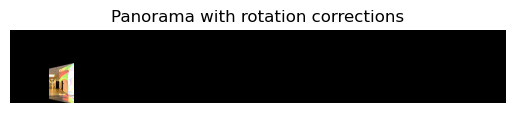

In [6]:
import os
import cv2
import numpy as np
import json
from glob import glob

# Set folders
folder = "../PALMS+/BE/Session_1744229291"
image_dir = os.path.join(folder, "images")
intrinsics_dir = os.path.join(folder, "intrinsics")
poses_dir = os.path.join(folder, "poses")

# Load files
image_paths = sorted(glob(os.path.join(image_dir, "image_*.png")))
intrinsic_paths = sorted(glob(os.path.join(intrinsics_dir, "cameraIntrinsics_*.json")))
pose_paths = sorted(glob(os.path.join(poses_dir, "cameraPose_*.json")))

# Load all images, intrinsics, poses
images = [cv2.imread(p) for p in image_paths]

intrinsics = []
for path in intrinsic_paths:
    with open(path) as f:
        data = json.load(f)
        K = np.array(data["data"])
        intrinsics.append(K)

rotations = []
for path in pose_paths:
    with open(path) as f:
        pose_data = json.load(f)["data"]
        T = np.array(pose_data).reshape(4, 4)
        R = T[:3, :3] #extracting under 3rd triangle
        R_fix = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 1]]) #90 ccw rotation 
        R = R @ R_fix  # Remove roll
        rotations.append(R)

# Utility: rotate intrinsics 90° clockwise
def rotate_intrinsics_90_clockwise(K, img_shape):
    h, w = img_shape[:2]
    fx, fy = K[0, 0], K[1, 1]
    cx, cy = K[0, 2], K[1, 2]
    return np.array([
        [fy, 0, h - cy],
        [0, fx, cx],
        [0,  0,  1]
    ])


# Use first image as reference
ref_idx = 0
R_ref = rotations[ref_idx]

# Prepare canvas
canvas_h, canvas_w = images[0].shape[:2]
canvas_h, canvas_w = canvas_w, canvas_h  # swapped due to rotation
panorama = np.zeros((canvas_h * 2, canvas_w * len(images), 3), dtype=np.uint8)
offset_x = canvas_w  # center x
offset_y = canvas_h  # center y

# Main loop
for i in range(len(images)):
    # Rotate image
    img = cv2.rotate(images[i], cv2.ROTATE_90_CLOCKWISE)

    # Adjust intrinsics
    K_i = rotate_intrinsics_90_clockwise(intrinsics[i], img.shape)

    # Relative rotation
    R_i = rotations[i]
    R_rel = R_ref @ R_i.T

    # Homography
    H = K_i @ R_rel @ np.linalg.inv(K_i)

    # Apply offset so panorama is centered
    offset_mat = np.array([[1, 0, offset_x], [0, 1, offset_y], [0, 0, 1]])
    H_offset = offset_mat @ H

    # Warp
    warped = cv2.warpPerspective(img, H_offset, (panorama.shape[1], panorama.shape[0]))

    # Alpha blend non-black areas
    mask = (warped > 0).astype(np.uint8)
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    panorama = cv2.bitwise_or(panorama, warped, mask=mask_gray)

# Save result
cv2.imwrite("panorama_output.jpg", panorama)
plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
plt.title("Panorama with rotation corrections")
plt.axis("off")
plt.show()


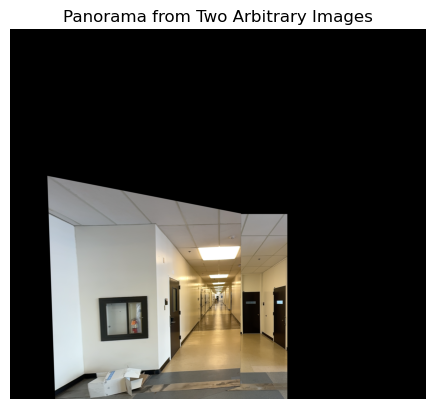

In [8]:
import os
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
import re

# === Set base paths ===
base_folder = "../PALMS+/BE/Session_1744229291"
image_dir = os.path.join(base_folder, "images")
intrinsics_dir = os.path.join(base_folder, "intrinsics")
poses_dir = os.path.join(base_folder, "poses")

# === Find and sort image filenames ===
image_paths = sorted(glob(os.path.join(image_dir, "image_*.png")))

# === Extract numeric index using regex ===
def extract_index_str(path):
    match = re.search(r"image_(\d+)\.png", os.path.basename(path))
    return match.group(1) if match else None  # e.g., "0042725"


# Sort by index
image_paths = sorted(image_paths, key=extract_index_str)

# === Load only first two images and corresponding data ===
images = []
Ks = []
Rs = []

for path in image_paths[:2]:
    index_str = extract_index_str(path)

    # Load and rotate image
    img = cv2.imread(path)
    if img is None:
        raise FileNotFoundError(f"Could not load {path}")
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    images.append(img)

    # Load intrinsics with leading zeros preserved
    K_path = os.path.join(intrinsics_dir, f"cameraIntrinsics_{index_str}.json")
    with open(K_path) as f:
        K = np.array(json.load(f)["data"])
        Ks.append(K)

    # Load pose with leading zeros preserved
    pose_path = os.path.join(poses_dir, f"cameraPose_{index_str}.json")
    with open(pose_path) as f:
        T = np.array(json.load(f)["data"]).reshape(4, 4)
        R = T[:3, :3]
        R_fix = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 1]]) #90 ccw rotation 
        R = R @ R_fix  # Remove roll
        Rs.append(R)

# === Homography from image 1 to image 0 ===
img0, img1 = images
K0, K1 = Ks
R0, R1 = Rs

R_rel = R0 @ R1.T
H = K0 @ R_rel @ np.linalg.inv(K1)

# === Create canvas and apply warp ===
h, w = img0.shape[:2]
canvas_h, canvas_w = h * 2, w * 3
offset_x, offset_y = w, h
offset_mat = np.array([[1, 0, offset_x], [0, 1, offset_y], [0, 0, 1]])
H_offset = offset_mat @ H

warped_img1 = cv2.warpPerspective(img1, H_offset, (canvas_w, canvas_h))

# === Blend images ===
panorama = np.zeros((canvas_h, canvas_w, 3), dtype=np.uint8)
panorama[offset_y:offset_y + h, offset_x:offset_x + w] = img0
mask = (warped_img1 > 0).astype(np.uint8)
mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

panorama_float = panorama.astype(np.float32)
warped_float = warped_img1.astype(np.float32)

# Create alpha mask from non-zero pixels
alpha = (mask_gray > 0).astype(np.float32)[..., None]

# Blend only where warped image has data
panorama_float = alpha * warped_float + (1 - alpha) * panorama_float

# Convert back to uint8
panorama = np.clip(panorama_float, 0, 255).astype(np.uint8)

# Convert to grayscale
gray = cv2.cvtColor(panorama, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# Find bounding box
x, y, w, h = cv2.boundingRect(thresh)

# Crop
panorama_cropped = panorama[y:y+h, x:x+w]
cv2.imwrite("panorama_cropped.jpg", panorama_cropped)

# === Save/show result ===
cv2.imwrite("panorama_two_images.jpg", panorama)
plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
plt.title("Panorama from Two Arbitrary Images")
plt.axis("off")
plt.show()


In [9]:
import cv2
import os
from glob import glob

# === Set image folder and load all images ===
image_dir = "../PALMS+/E2/Session_1744220648/images"
image_paths = sorted(glob(os.path.join(image_dir, "image_*.png")))

# Optional: Limit to a few images to test
image_paths = image_paths[14:]

# Load and rotate images
images = [cv2.rotate(cv2.imread(p), cv2.ROTATE_90_CLOCKWISE) for p in image_paths]

# === Stitch using OpenCV Stitcher ===
stitcher = cv2.Stitcher_create()  # or cv2.Stitcher.create() for older OpenCV
status, stitched = stitcher.stitch(images)

if status == cv2.Stitcher_OK:
    cv2.imwrite("stitched_panorama_1744220648.jpg", stitched)
    cv2.imshow("Panorama", stitched)
else:
    print(f" Stitching failed with status {status}")